In [ ]:
#TASK 1 - Install matplotlib and deap
!pip install matplotlib deap

In [ ]:
#Import all necessary libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles

# Define the number of locations (eg 10)
num_locations = 10

In [ ]:
# Create a list of tuples representing location coordinates
# (x, y) could be between 0 and 100
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]


In [ ]:
# Define the coordinates for the depot
depot = (random.randint(0, 100), random.randint(0, 100))

In [ ]:
# Define the number of vehicles
num_vehicles = 3

In [ ]:
# Print the generated data
print("Number of Locations:", num_locations)
print("Locations:", locations)
print("Depot:", depot)
print("Number of Vehicles:", num_vehicles)

Number of Locations: 10
Locations: [(54, 85), (31, 51), (32, 67), (88, 29), (12, 94), (2, 1), (57, 81), (33, 74), (71, 85), (55, 22)]
Depot: (99, 14)
Number of Vehicles: 3


In [ ]:
# TASK 3 - Genetic Algorithm Setup

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Weights indicate minimization
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
num_locations = 10  # Total locations
toolbox.register("attribute", random.sample, range(num_locations), num_locations)  # Random sequence of locations


In [ ]:
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attribute)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [ ]:
population_size = 50
population = toolbox.population(n=population_size)


In [ ]:
print("First Individual:", population[0])
print("Fitness of the First Individual:", population[0].fitness.values)

First Individual: [6, 0, 1, 3, 8, 7, 9, 2, 5, 4]
Fitness of the First Individual: ()


In [ ]:
#TASK 4 - Starting with the toolbox and tools

# Define the fitness function (minimization problem)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimization problem

# Define the individual (a list of integers)
creator.create("Individual", list, fitness=creator.FitnessMin)

# Create a toolbox to register functions
toolbox = base.Toolbox()

# Define how to generate indices (random permutation of locations)
num_locations = 10  # Example: total locations
toolbox.register("indices", random.sample, range(num_locations), num_locations)

# Define how to build an individual
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

# Define how to build a population
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Example: Create a population of size 50
population_size = 50
population = toolbox.population(n=population_size)

# Print the first individual and population size
print("First Individual:", population[0])
print("Population Size:", len(population))


First Individual: [0, 7, 9, 4, 8, 3, 2, 5, 1, 6]
Population Size: 50


In [ ]:
# TASK 5 and 6

import math
from statistics import stdev
# Task 5: Fitness Evaluation Function
def evalVRP(individual):
    """Calculate total distance and standard deviation of distances for VRP."""
    def distance(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    # Calculate distances
    distances = [distance(depot, locations[individual[0]])]  # From depot to first location
    distances += [distance(locations[individual[i]], locations[individual[i + 1]]) for i in range(len(individual) - 1)]
    distances.append(distance(locations[individual[-1]], depot))  # From last location to depot

    # Return total distance and standard deviation
    return sum(distances), stdev(distances)

# Task 6: Register the Evaluation Function
# Setup for DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Minimize both total distance and standard deviation
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Example setup for locations and depot
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)  # Fixed depot location

# Register functions in the toolbox
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalVRP)

# Test the setup
population = toolbox.population(n=5)  # Create a small population
for ind in population:
    ind.fitness.values = toolbox.evaluate(ind)  # Assign fitness
    print(f"Individual: {ind}")
    print(f"Fitness (Total Distance, Standard Deviation): {ind.fitness.values}")


Individual: [1, 2, 3, 9, 6, 8, 0, 7, 4, 5]
Fitness (Total Distance, Standard Deviation): (582.2288474225729, 20.96351142276901)
Individual: [2, 3, 6, 1, 7, 0, 5, 9, 4, 8]
Fitness (Total Distance, Standard Deviation): (539.351222712973, 21.096371630733298)
Individual: [1, 0, 6, 3, 4, 8, 2, 5, 9, 7]
Fitness (Total Distance, Standard Deviation): (517.0589341359384, 21.07002580794191)
Individual: [4, 9, 1, 5, 6, 8, 2, 0, 7, 3]
Fitness (Total Distance, Standard Deviation): (470.6110917882679, 18.584744546842842)
Individual: [5, 1, 2, 3, 8, 0, 7, 9, 4, 6]
Fitness (Total Distance, Standard Deviation): (526.6132505114847, 13.823722819759151)


In [ ]:
import math
import numpy as np

# Example data
num_vehicles = 2  # Number of vehicles
depot = (0, 0)  # Depot coordinates
locations = [(10, 20), (30, 40), (50, 60), (70, 80), (90, 100)]  # Locations

# Example individual (route representation)
individual = [3, 1, 2, 4, 0]  # This individual lists the order in which locations are visited

# Define evalVRP function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation

    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        # Generate the route for the current vehicle
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(
            math.sqrt((vehicle_route[k][0] - vehicle_route[k + 1][0]) ** 2 + (vehicle_route[k][1] - vehicle_route[k + 1][1]) ** 2)
            for k in range(len(vehicle_route) - 1)
        )

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    # Calculate the balance penalty as the standard deviation of distances
    balance_penalty = np.std(distances)  # Standard deviation of distances for vehicle balance
    return total_distance, balance_penalty

# Call the evalVRP function with the individual
total_distance, balance_penalty = evalVRP(individual)

# Print the results
print(f"Total Distance: {total_distance}")
print(f"Balance Penalty: {balance_penalty}")


Total Distance: 482.9040058578529
Balance Penalty: 27.937051284196343


In [ ]:
# Task 7 - Configure genetic operators

# Crossover (uniform crossover)
toolbox.register("mate", tools.cxUniform, indpb=0.5)

# Mutation (swap mutation)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)

# Selection (tournament selection)
toolbox.register("select", tools.selTournament, tournsize=3)

# Example of how to use these operators
if __name__ == "__main__":
    # Create a population
    population = toolbox.population(n=10)

    # Perform crossover on two individuals
    offspring = toolbox.mate(population[0], population[1])

    # Perform mutation on the offspring
    toolbox.mutate(offspring[0])

    # Perform selection
    selected_individuals = toolbox.select(population, 3)

    # Print the results
    print("Selected Individuals:", selected_individuals)
    print("Offspring after crossover and mutation:", offspring)


Selected Individuals: [[2, 0, 1, 4, 3], [1, 2, 3, 0, 4], [2, 3, 0, 1, 4]]
Offspring after crossover and mutation: ([3, 0, 2, 3, 1], [2, 4, 4, 0, 1])


In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

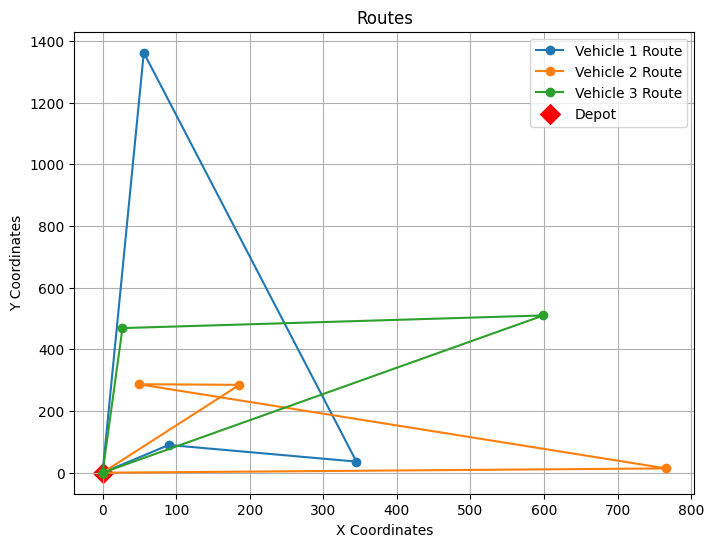

In [ ]:
import matplotlib.pyplot as plt

def plot_routes(individual, locations, depot, num_vehicles, title="Routes"):
    plt.figure(figsize=(8, 6))

    # Split the individual into vehicle routes
    vehicle_routes = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_routes.append(vehicle_route)

    # Plot each vehicle's route
    for i, route in enumerate(vehicle_routes):
        route_x, route_y = zip(*route)  # Unzip the coordinates into x and y lists
        plt.plot(route_x, route_y, marker='o', label=f'Vehicle {i+1} Route')  # Plot the route with circles at each point

    # Plot depot as a different marker (e.g., red)
    depot_x, depot_y = zip(*[depot])
    plt.scatter(depot_x, depot_y, color='red', s=100, marker='D', label="Depot")

    # Set labels and title
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title(title)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage:
individual = [0, 1, 2, 3, 4, 5, 6, 7]
locations = [(90, 90), (186, 285), (27, 469), (345, 36), (49, 287), (599, 510), (56, 1362), (766, 14)]
depot = (0, 0)
num_vehicles = 3


plot_routes(individual, locations, depot, num_vehicles)
